In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('AutomobilepriceData.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Cleaning the data and preparing it for training and testing

In [3]:
##Replacing the ? value to Nan before filling it
df.replace(to_replace ="?", 
                 value =np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
##Getting dummy values for columns with classifications and including them in training as well
make = pd.get_dummies(df['make'],drop_first=True)
fueltype = pd.get_dummies(df['fuel-type'],drop_first=True)
aspiration = pd.get_dummies(df['aspiration'],drop_first=True)
numofdoors = pd.get_dummies(df['num-of-doors'],drop_first=True)
bodystyle = pd.get_dummies(df['body-style'],drop_first=True)
drivewheels = pd.get_dummies(df['drive-wheels'],drop_first=True)
enginelocation = pd.get_dummies(df['engine-location'],drop_first=True)
fuelsystem = pd.get_dummies(df['fuel-system'],drop_first=True)
enginetype = pd.get_dummies(df['engine-type'],drop_first=True)
cylno = pd.get_dummies(df['num-of-cylinders'],drop_first=True)

df.drop(['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','fuel-system','engine-type','num-of-cylinders'],axis=1,inplace=True) 

df = pd.concat([df,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,fuelsystem,enginetype,cylno],axis=1)


In [5]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,1,0,0,0,1,0,0,0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1,0,0,0,0,1,0,0,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,0,0,0,1,0,0,0,0,0


In [6]:
#Chaning all the object type columns to numeric columns
df['normalized-losses'] = df['normalized-losses'].apply(pd.to_numeric)
df['bore'] = df['bore'].apply(pd.to_numeric)
df['stroke'] = df['stroke'].apply(pd.to_numeric)
df['horsepower'] = df['horsepower'].apply(pd.to_numeric)
df['peak-rpm'] = df['peak-rpm'].apply(pd.to_numeric)
df['price'] = df['price'].apply(pd.to_numeric)

In [8]:
#Here we can see we have successfully converted all object columns to integer columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               201 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    float64
 12  peak-rpm           203 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    float64
 16  audi               205 non

In [9]:
#Replacing the Nan values with mean of the respective columns to get better results
df['normalized-losses'] = df['normalized-losses'].replace(to_replace =np.nan, 
                 value =df['normalized-losses'].mean()) 
df['bore'] = df['bore'].replace(to_replace =np.nan, 
                 value =df['bore'].mean()) 
df['stroke'] = df['stroke'].replace(to_replace =np.nan, 
                 value =df['stroke'].mean()) 
df['peak-rpm'] = df['peak-rpm'].replace(to_replace =np.nan, 
                 value =df['peak-rpm'].mean()) 
df['horsepower'] = df['horsepower'].replace(to_replace =np.nan, 
                 value =df['horsepower'].mean()) 
df['price'] = df['price'].replace(to_replace =np.nan, 
                 value =df['price'].mean()) 

In [10]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,1,0,0,0,1,0,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1,0,0,0,0,1,0,0,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,0,0,0,1,0,0,0,0,0


In [12]:
#Checking if null values still exist
df.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
                    ..
four                 0
six                  0
three                0
twelve               0
two                  0
Length: 66, dtype: int64

In [13]:
df= df.replace([np.inf, -np.inf], np.nan)

In [14]:
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,1,0,0,0,1,0,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1,0,0,0,0,1,0,0,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,1,0,0,0,0,1,0,0,0,0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,1,0,0,0,0,1,0,0,0,0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,1,0,0,0,1,0,0,0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,1,0,0,0,0,0,1,0,0,0


# Linear Regression

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('price',axis=1), 
                                                    df['price'], test_size=0.355, 
                                                    random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-1.31899904e+02 -1.53350928e+00  2.52245423e+02 -1.01409945e+02
  6.67745040e+02 -3.25904413e+02  6.57674121e+00  1.24786661e+02
 -1.20782345e+04 -1.54349863e+03 -8.62165300e+02  1.51359003e+01
  1.09360902e+00 -1.30728048e+02  1.69048871e+02  5.38385991e+03
  1.09698364e+04  1.11897794e+02 -1.19605476e+03  1.30633540e+03
  6.91874495e+03 -3.54603823e+02  1.10316166e+03  6.25759711e+03
  2.80032872e+03 -1.49662016e+03  1.92617447e+03 -6.15107032e+02
 -1.17952455e+03  1.10685146e+04  1.58601763e+03  7.47349982e+03
 -4.41776383e+02  1.01231790e+03  2.26993545e+03  4.33070552e+03
 -5.86533016e+03  8.49502515e+02 -1.62882523e+02 -3.46068955e+03
 -4.10961293e+03 -3.84849091e+03 -4.59627687e+03  7.87853852e+02
  1.61439860e+03  4.99986498e+03  1.10581768e+03 -7.22993671e+02
  5.86533016e+03 -8.05764629e+02 -4.88976034e+02 -8.92211695e+02
 -5.36753721e+03 -1.88427255e+04 -6.15107032e+02 -8.18349518e+02
  4.55808860e+03 -2.05980283e+03  7.11055543e+03  2.42333940e+03
  6.83937

In [18]:
pred1 = lm.predict( X_test)

Text(0.5, 1.0, 'Linear Regression')

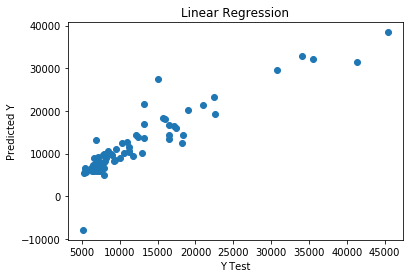

In [19]:

plt.scatter(y_test,pred1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Linear Regression')

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))

MAE: 2055.1242780372563
MSE: 10887779.956863485
RMSE: 3299.6636126828876


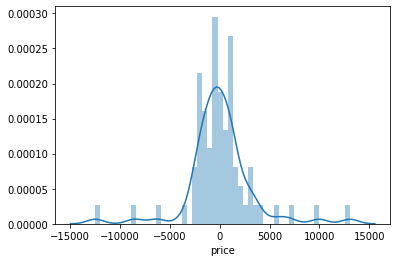

In [22]:
sns.distplot((y_test-pred1),bins=50);

In [23]:
accuracy = lm.score(X_test,y_test)
print(accuracy*100,'%')

83.88886251341887 %


### So, we can see that the accuracy of Linear Regression is 83.88%

# Decision Tree Regression

In [24]:
from sklearn import tree

In [25]:
clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
pred2 = clf.predict(X_test)

Text(0.5, 1.0, 'Decision Tree Regression')

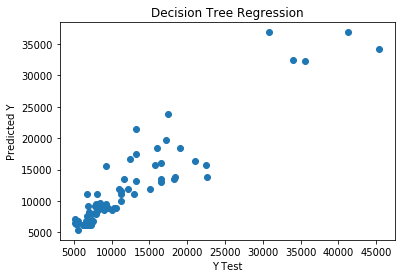

In [29]:
plt.scatter(y_test,pred2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Decision Tree Regression')

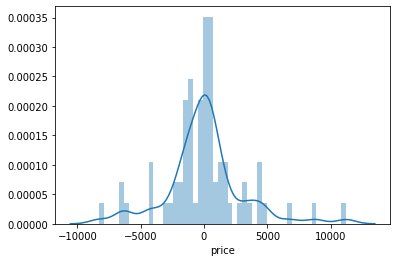

In [31]:
sns.distplot((y_test-pred2),bins=50);

In [32]:
accuracy = clf.score(X_test,y_test)
print(accuracy*100,'%')

86.0064204883257 %


### We can observe that the accuracy of Decision Tree Regressor is 86.006% 

# Support Vector Regression 

In [33]:
from sklearn.svm import SVR

model = SVR()

In [34]:
model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [35]:
pred3 = model.predict(X_test)

Text(0.5, 1.0, 'Support Vector Regression')

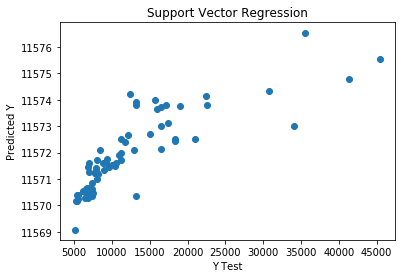

In [37]:
plt.scatter(y_test,pred3)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Support Vector Regression')

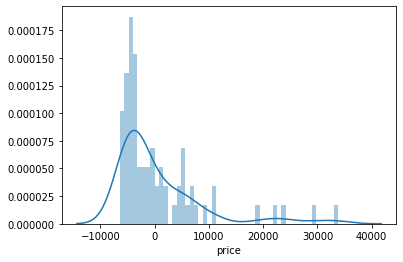

In [39]:
sns.distplot((y_test-pred3),bins=50);

In [41]:
accuracy = model.score(X_test,y_test)
print(accuracy*100,'%')

-0.6161023303145052 %


### Here, we can observe Support Vector Regression has accuracy of 61% 

# Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rfr = RandomForestRegressor()

In [44]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
pred_rf = rfr.predict(X_test)

Text(0.5, 1.0, 'Random Forest Regressor')

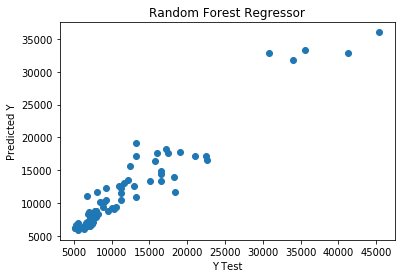

In [46]:
plt.scatter(y_test,pred_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Random Forest Regressor')

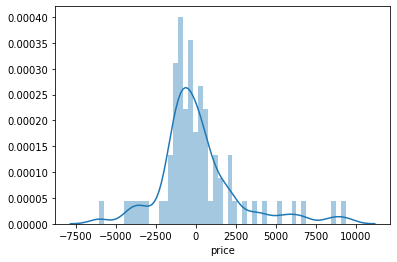

In [48]:
sns.distplot((y_test-pred_rf),bins=50);

In [49]:
accuracy = rfr.score(X_test,y_test)
print(accuracy*100,'%')

90.1328730695009 %


### We can observe Random Forest Regressor has an accuracy of 90% 

# Bayesian Regression Model

In [50]:
from sklearn import linear_model

In [51]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [52]:
predic = reg.predict(X_test)

Text(0.5, 1.0, 'Bayesian Regression')

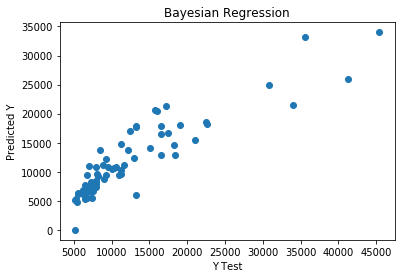

In [53]:
plt.scatter(y_test,predic)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Bayesian Regression')

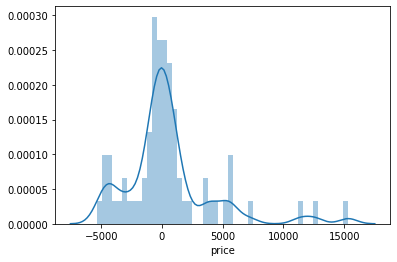

In [54]:
sns.distplot((y_test-predic),bins=50);

In [55]:
accuracy = reg.score(X_test,y_test)
print(accuracy*100,'%')

79.64550830972665 %


### We can observe that the accuracy of Bayesian Model is 79.6% 

# Stockhalm Gradient Descent

In [63]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5

In [70]:
reg1 = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=5000, tol=1e-3))

In [71]:
reg1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=5000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [72]:
pr = reg1.predict(X_test)

Text(0.5, 1.0, 'Gradient Descent')

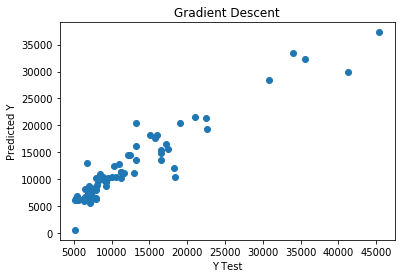

In [73]:
plt.scatter(y_test,pr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Gradient Descent')

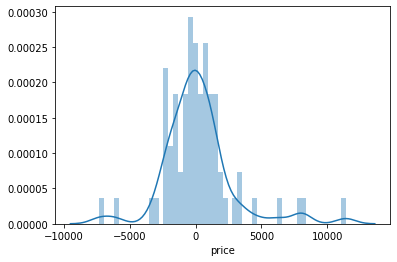

In [74]:
sns.distplot((y_test-pr),bins=50);

In [75]:
accuracy = reg1.score(X_test,y_test)
print(accuracy*100,'%')

88.77697150295438 %


### We can observe that Stockholm Gradient Descent has an accuracy of 88.7% 

# Exploratory Data Analysis